In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
df = pd.read_csv("14.csv")

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (45000, 14)


In [ ]:
print("Data Types:\n", df.dtypes)

Data Types:
 person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [ ]:
print("Sample Data:\n", df.head())

Sample Data:
    person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0  

In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


loan_status
0    35000
1    10000
Name: count, dtype: int64


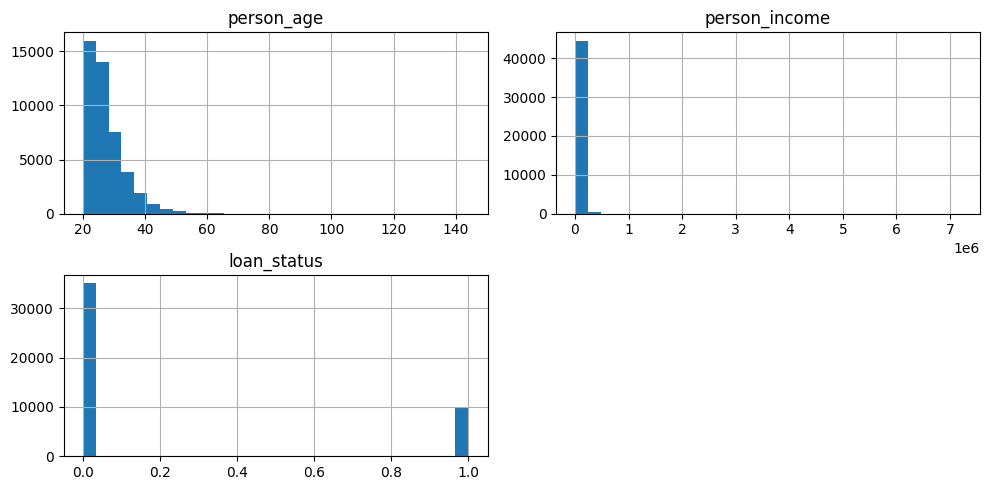

In [ ]:
print(df['loan_status'].value_counts())
df[['person_age', 'person_income','loan_status']].hist(bins=30, figsize=(10,5))
plt.tight_layout()
plt.show()

In [ ]:
df['person_income'].max()

7200766.0

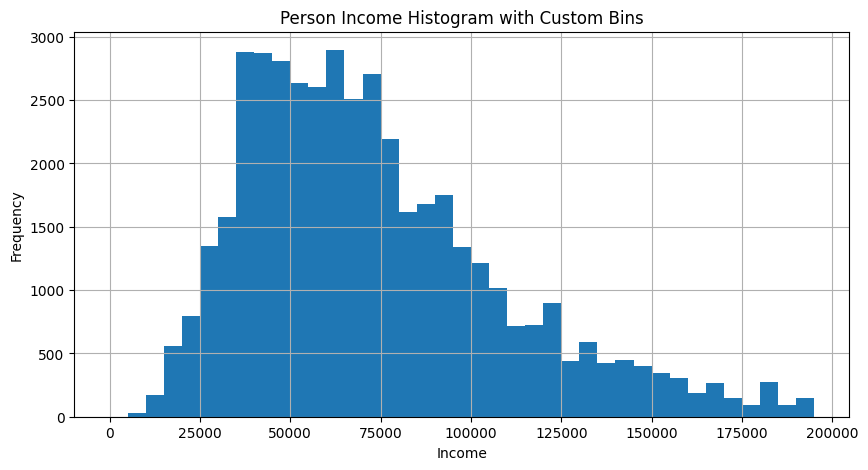

In [ ]:
df['person_income'].hist(bins=np.arange(0, 200000, 5000), figsize=(10,5))
plt.title("Person Income Histogram with Custom Bins")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

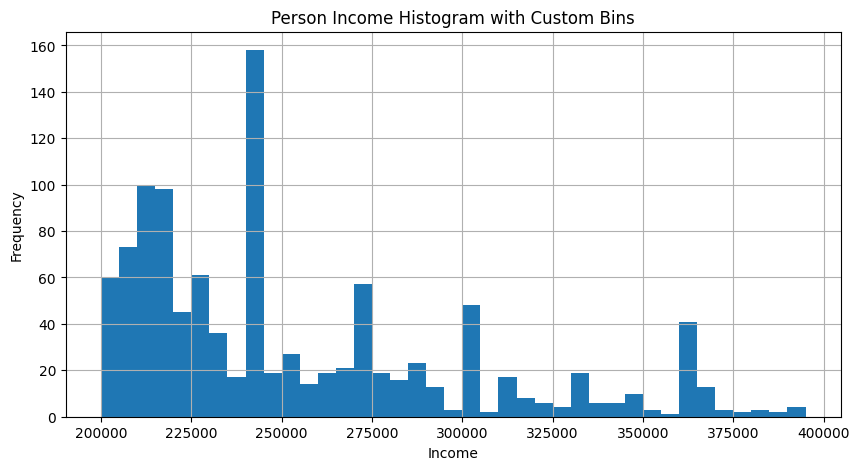

In [ ]:
df['person_income'].hist(bins=np.arange(200000, 400000, 5000), figsize=(10,5))
plt.title("Person Income Histogram with Custom Bins")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

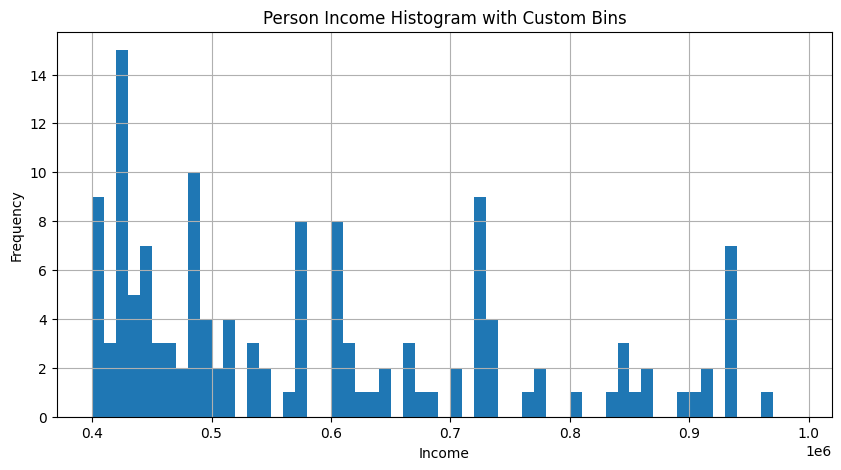

In [ ]:
df['person_income'].hist(bins=np.arange(400000, 1000000, 10000), figsize=(10,5))
plt.title("Person Income Histogram with Custom Bins")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

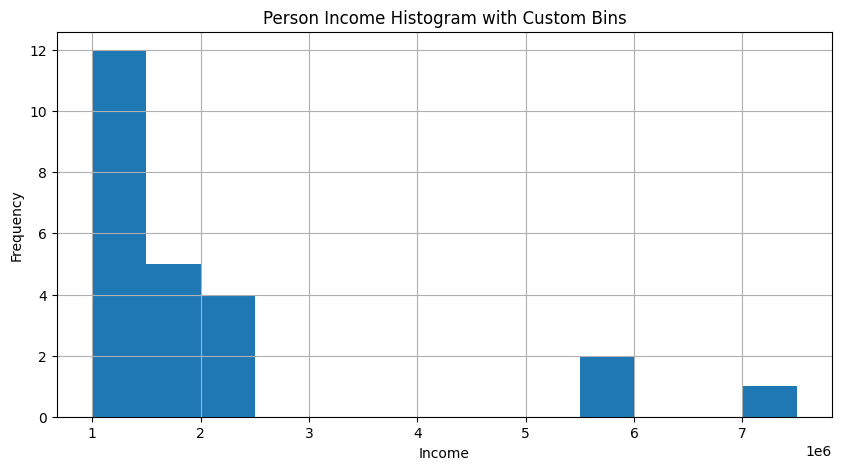

In [ ]:
df['person_income'].hist(bins=np.arange(1000000, 8000000, 500000), figsize=(10,5))
plt.title("Person Income Histogram with Custom Bins")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

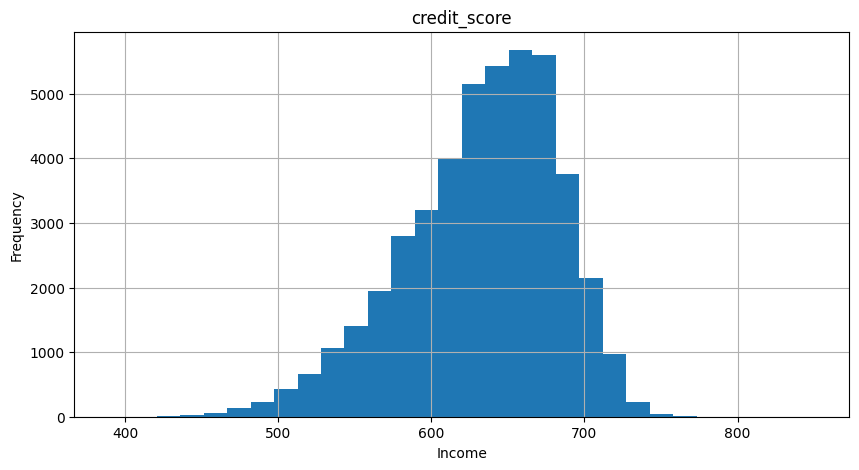

In [ ]:
df['credit_score'].hist(bins=30, figsize=(10,5))
plt.title("credit_score")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

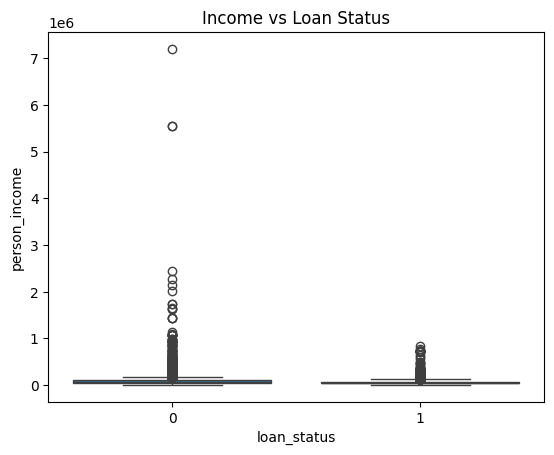

In [ ]:
sns.boxplot(data=df, x='loan_status', y='person_income')
plt.title('Income vs Loan Status')
plt.show()

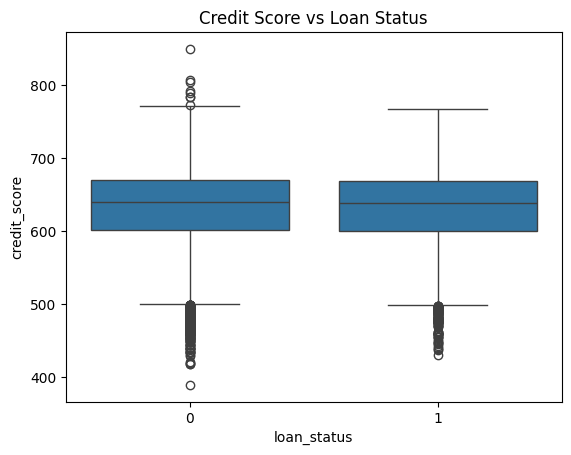

In [ ]:
sns.boxplot(data=df, x='loan_status', y='credit_score')
plt.title('Credit Score vs Loan Status')
plt.show()

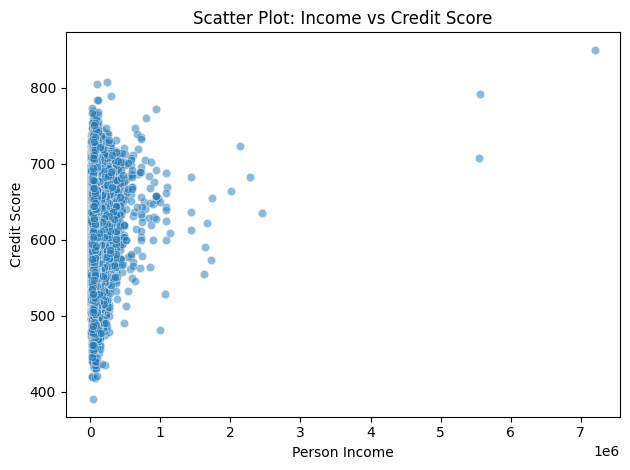

In [ ]:
sns.scatterplot(data=df, x='person_income', y='credit_score', alpha=0.5)
plt.title("Scatter Plot: Income vs Credit Score")
plt.xlabel("Person Income")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

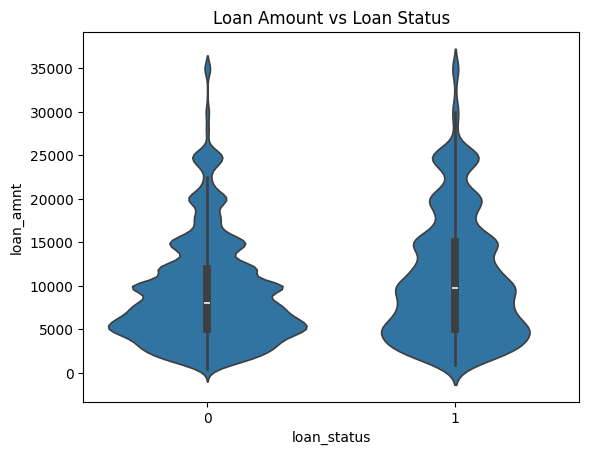

In [ ]:
sns.violinplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Amount vs Loan Status')
plt.show()

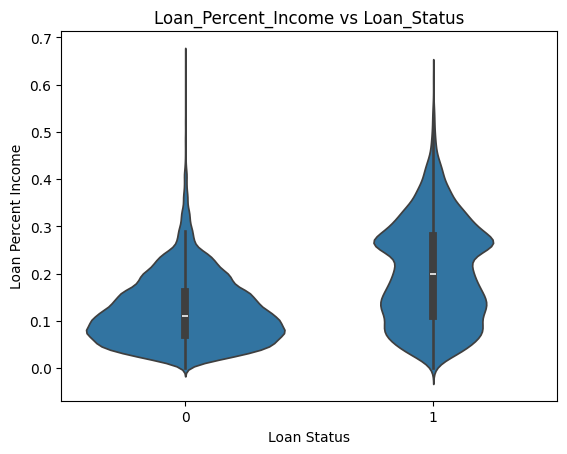

In [ ]:
sns.violinplot(data=df, x='loan_status', y='loan_percent_income')
plt.title('Loan_Percent_Income vs Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')
plt.show()

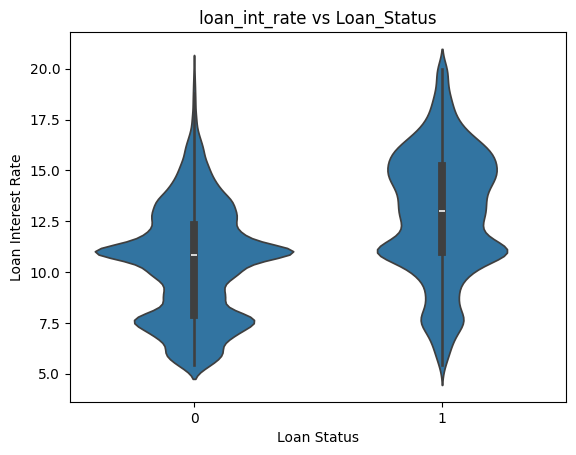

In [ ]:
sns.violinplot(data=df, x='loan_status', y='loan_int_rate')
plt.title('loan_int_rate vs Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Interest Rate')
plt.show()

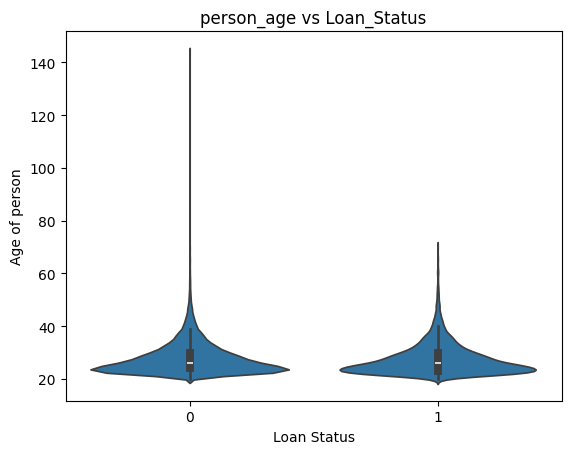

In [ ]:
sns.violinplot(data=df, x='loan_status', y='person_age')
plt.title('person_age vs Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Age of person')
plt.show()

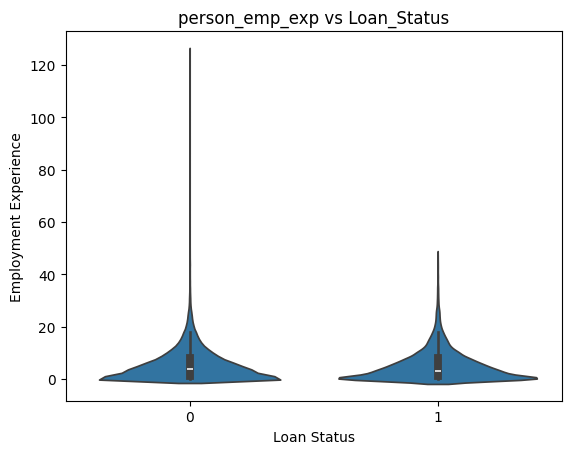

In [ ]:
sns.violinplot(data=df, x='loan_status', y='person_emp_exp')
plt.title('person_emp_exp vs Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Experience')
plt.show()

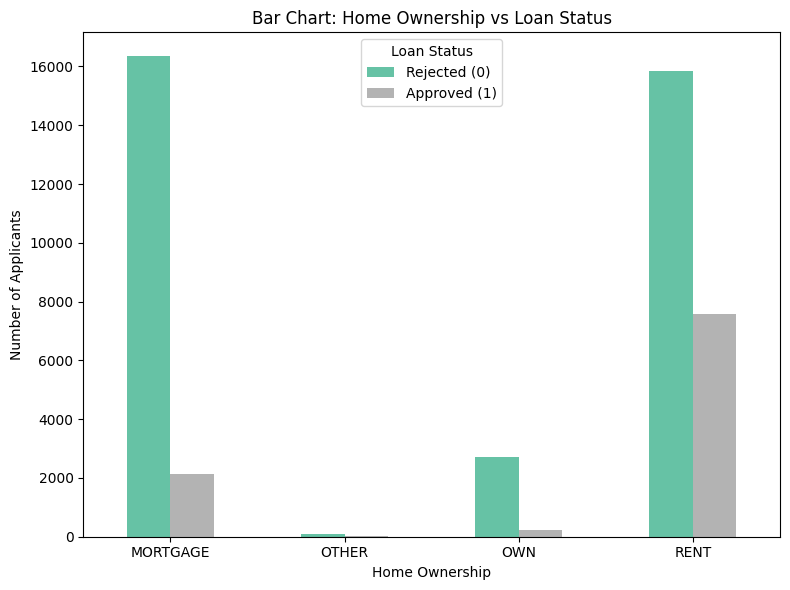

In [ ]:
ownership_loan = pd.crosstab(df['person_home_ownership'], df['loan_status'])

ownership_loan.plot(kind='bar', stacked=False, figsize=(8,6), colormap='Set2')
plt.title('Bar Chart: Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Rejected (0)', 'Approved (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

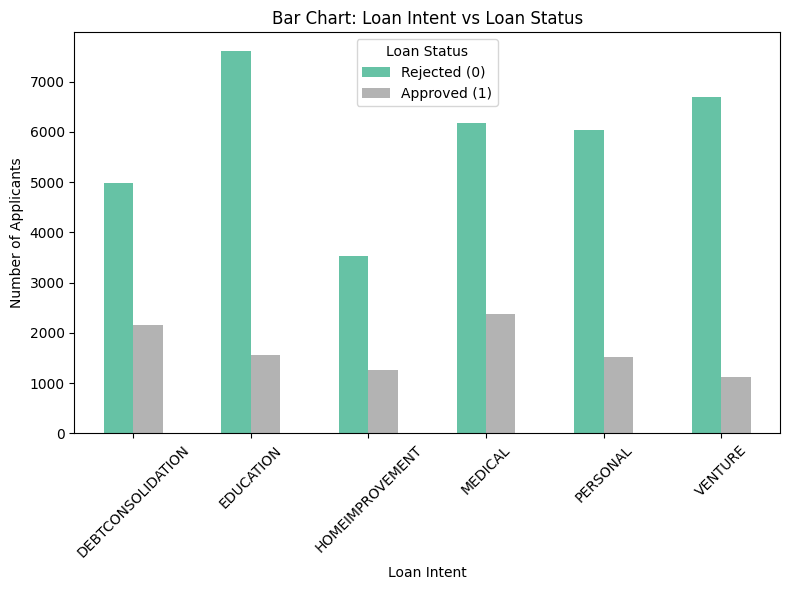

In [ ]:
ownership_loan = pd.crosstab(df['loan_intent'], df['loan_status'])

ownership_loan.plot(kind='bar', stacked=False, figsize=(8,6), colormap='Set2')
plt.title('Bar Chart: Loan Intent vs Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Rejected (0)', 'Approved (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

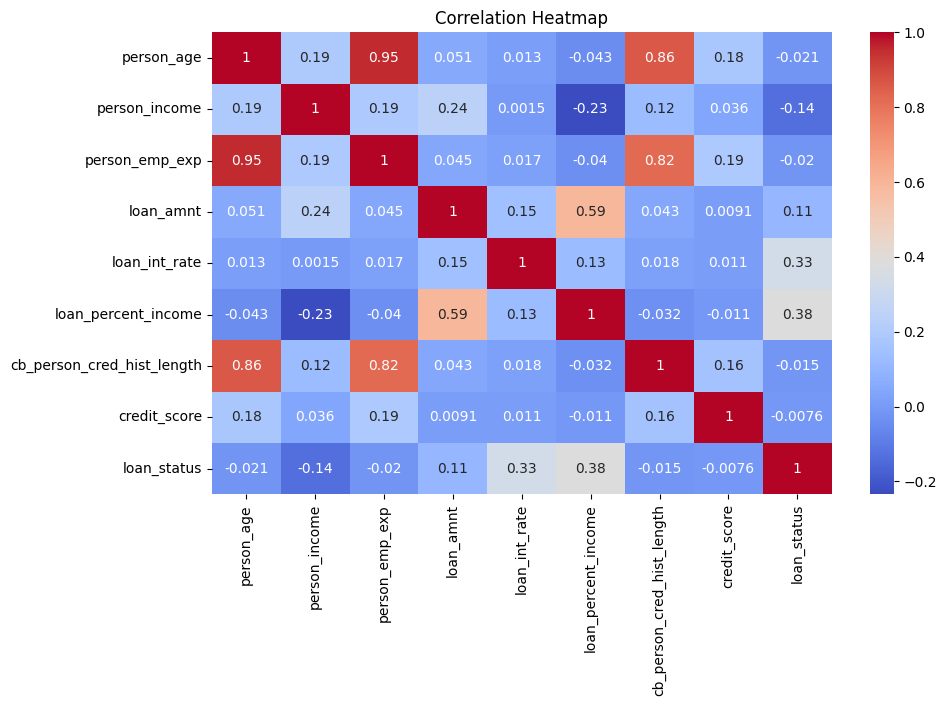

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

categorical_columns = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=300, random_state=42)
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "roc_curve": roc_curve(y_test, y_proba)
    }

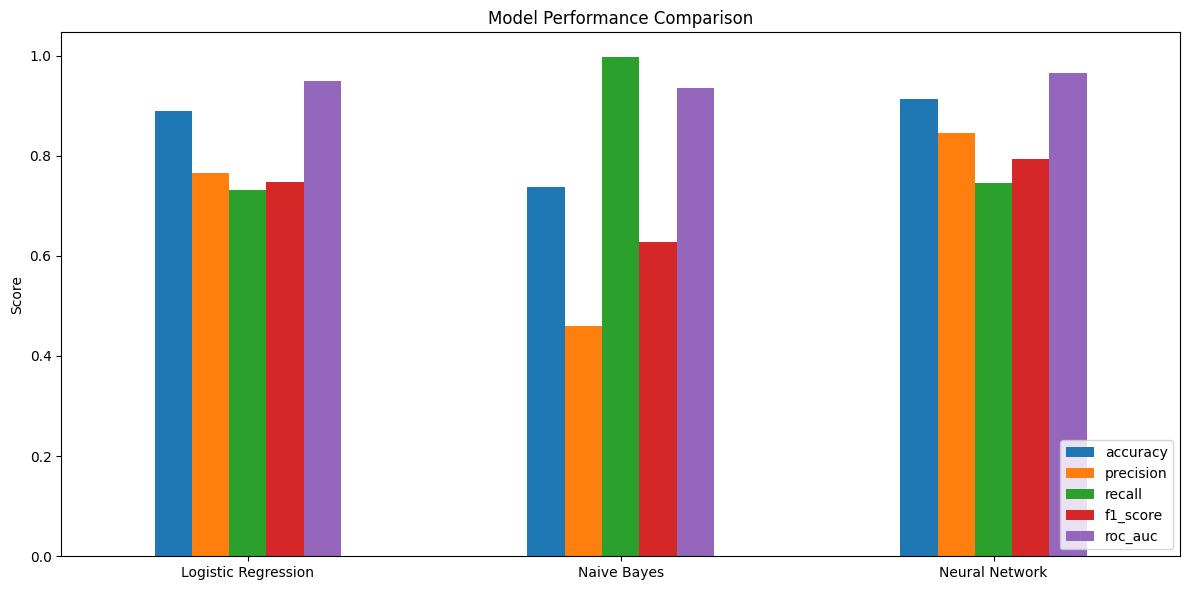

In [ ]:
metrics_df = pd.DataFrame({
    name: {
        "accuracy": r["accuracy"],
        "precision": r["precision"],
        "recall": r["recall"],
        "f1_score": r["f1_score"],
        "roc_auc": r["roc_auc"]
    } for name, r in results.items()
}).T

metrics_df.plot(kind='bar', figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
metrics_table = pd.DataFrame({
    name: {
        "Accuracy": res["accuracy"],
        "Precision": res["precision"],
        "Recall": res["recall"],
        "F1 Score": res["f1_score"],
        "roc_auc": res["roc_auc"]
    }
    for name, res in results.items()
}).T

metrics_table = metrics_table.round(4)
print(metrics_table)

                     Accuracy  Precision  Recall  F1 Score  roc_auc
Logistic Regression    0.8901     0.7663  0.7308    0.7482   0.9483
Naive Bayes            0.7369     0.4590  0.9965    0.6285   0.9360
Neural Network         0.9130     0.8460  0.7463    0.7930   0.9645


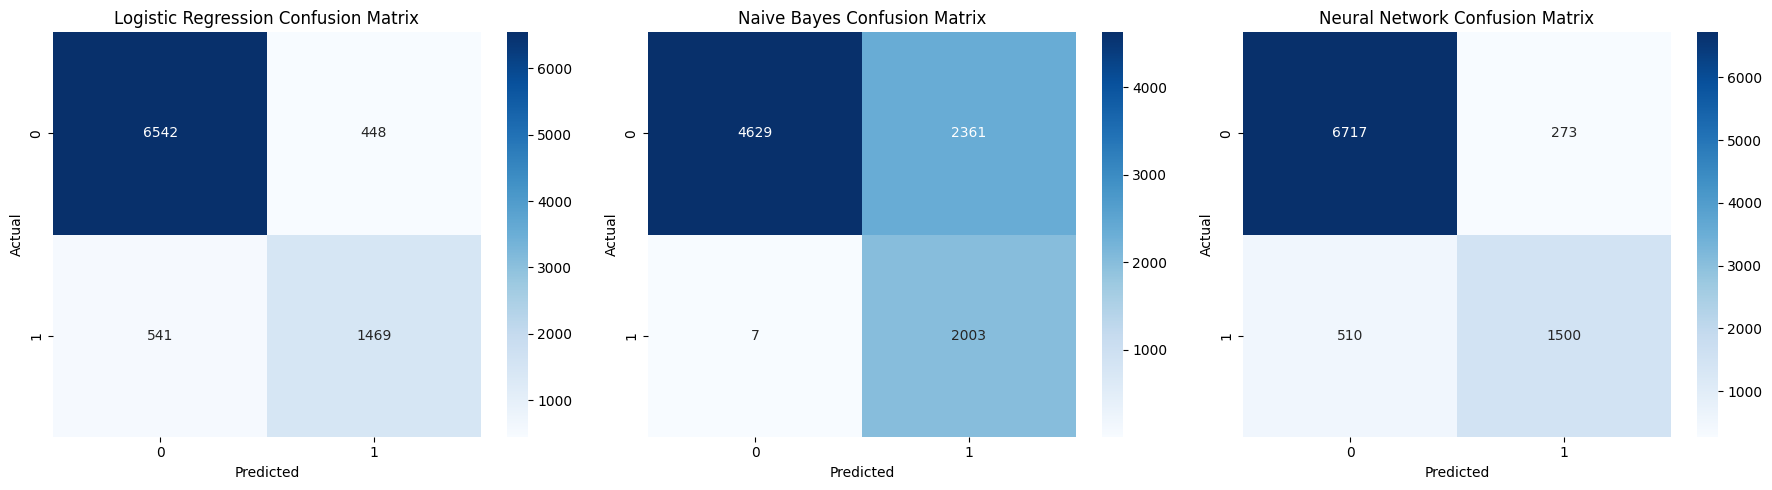

In [ ]:
num_models = len(results)
cols = 3
rows = math.ceil(num_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

for i, (name, res) in enumerate(results.items()):
    cm = res['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

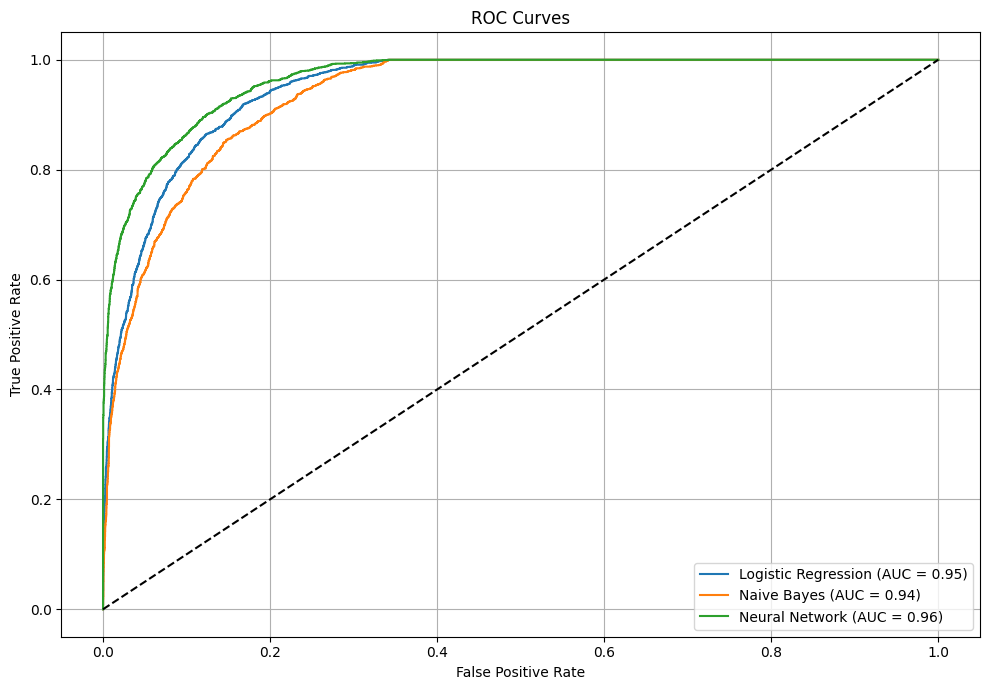

In [ ]:
plt.figure(figsize=(10, 7))
for name, res in results.items():
    fpr, tpr, _ = res['roc_curve']
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()